In [1]:
#Importing the libraries we need
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading the data into csv file
melbourne_data=pd.read_csv("home-data-for-ml-course/train.csv")
melbourne_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
melbourne_data.shape

(1460, 81)

In [4]:
melbourne_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
melbourne_data.info()
melbourne_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
'''As you will only be dealing with categorical features in this tutorial, it's better to filter them out. 
You can create a separate DataFrame consisting of only these features by running the following command. The method 
.copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.'''

melbourne_features= melbourne_data.select_dtypes(include=['object']).copy()
melbourne_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [24]:
'''One of the most common data pre-processing steps is to check for null values in the dataset. 
You can get the total number of missing values in the DataFrame by the following one liner code:'''
print(melbourne_data.isnull().values.sum())


#Let's also check the column-wise distribution of null values:

Melbourne=melbourne_data.isnull().sum()
Melbourne.head(81)


6965


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [25]:
# Handling missing values for the columns with object data type and for those objects with string/float data type
#Let us first handle missing values for LotFrontage, MasVnrArea, GarageYrBlt
melbourne_data.GarageYrBlt.describe()



count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [26]:
#Since this feature has same mean and median, we can replace either by Mean or Median Because data is almost Normal distribution
melbourne_data['GarageYrBlt'].replace({np.nan:melbourne_data.GarageYrBlt.mean()},inplace=True)
melbourne_data.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [27]:
#Handling missing values for LotFrontage
melbourne_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [28]:
#Since this feature has same mean and median, we can replace either by Mean or Median Because data is almost Normal distribution
melbourne_data['LotFrontage'].replace({np.nan:melbourne_data.LotFrontage.mean()},inplace=True)
melbourne_data.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [30]:
melbourne_data.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

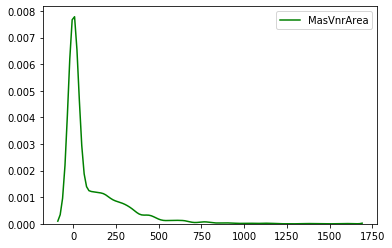

In [31]:
#From MasVnr column, we cannot get an accurate description of that column,so we use seaborn to visualise the column
sns.kdeplot(melbourne_data.MasVnrArea,Label='MasVnrArea',color='g')

In [33]:
#Since, most of the values here are 0, we replace the missing values with 0
melbourne_data.MasVnrArea.replace({np.nan:0},inplace=True)
melbourne_data['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [36]:
#Handling misssing values for columns with object data type
#cols=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','MasVnrType','FirePlaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

melbourne_data= melbourne_data.fillna(0)

In [37]:
melbourne_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


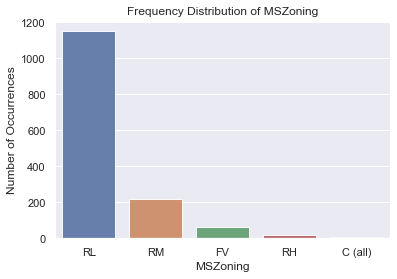

In [38]:
#To get the distribution of categories within a feature, we can use this code

#Getting the frequency distribution of categories within the feature
print(melbourne_data['MSZoning'].value_counts())

#Getting the frequency distribution of categories within the feature
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
MSZoning_count = melbourne_data['MSZoning'].value_counts()
sns.set(style="darkgrid")
sns.barplot(MSZoning_count.index, MSZoning_count.values, alpha=0.9)
plt.title('Frequency Distribution of MSZoning')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MSZoning', fontsize=12)
plt.show()

In [41]:
#Extracting the features we intend using to train the model
X=melbourne_data.iloc[:,:-1]

y=melbourne_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=1)

#summarize
print('Train', X_train.shape, y_train.shape)
print('Test',X_test.shape, y_test.shape)

Train (978, 80) (978,)
Test (482, 80) (482,)


In [42]:
#Data Processing, Trying to encode all columns of type object. This will ensure that they are numerical values and are useful for 
# feature selcetion

#Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in melbourne_features:
    melbourne_data[feat] = le.fit_transform(melbourne_data[feat].astype(str))

print (melbourne_data.info())
 

   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
melbourne_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000


In [47]:
'''Le us recheck to see if we have any missing values. One of the most common data pre-processing steps is to check for null values in the dataset. 
You can get the total number of missing values in the DataFrame by the following one liner code:'''

print(melbourne_data.isnull().values.sum())


#Let's also check the column-wise distribution of null values:

Melbourne=melbourne_data.isnull().sum()
Melbourne.head(60)


0


Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [48]:
#Extracting the features we intend using to train the model
X=melbourne_data.iloc[:,:-1]

y=melbourne_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=1)

#summarize
print('Train', X_train.shape, y_train.shape)
print('Test',X_test.shape, y_test.shape)

Train (978, 80) (978,)
Test (482, 80) (482,)


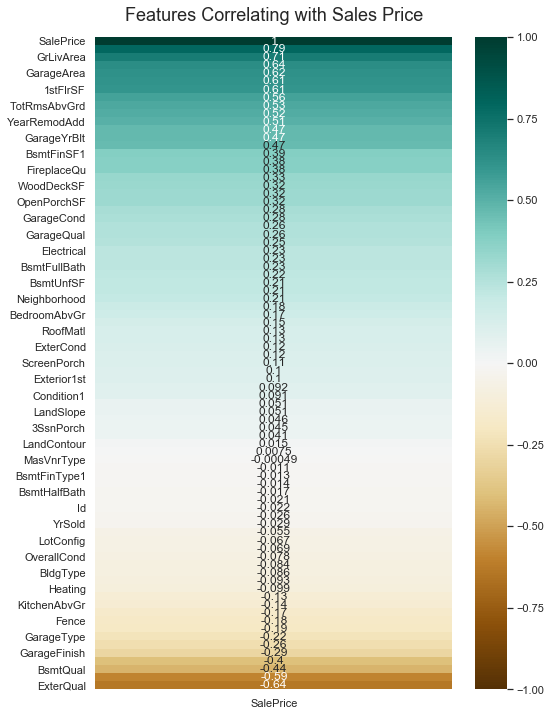

In [54]:
melbourne_data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(melbourne_data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [85]:
'''from sklearn.feature_selection import SelectKBest # SELECT K  BEST  is used to first top k features from variables list
from sklearn.feature_selection import chi2 # import chi1 function'''

# # apply SelectKBest class to extract top 30 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores)  #print  TOP 30 best features''



"from sklearn.feature_selection import SelectKBest # SELECT K  BEST  is used to first top k features from variables list\nfrom sklearn.feature_selection import chi2 # import chi1 function\n\n# # apply SelectKBest class to extract top 30 best features\nbestfeatures = SelectKBest(score_func=chi2, k='all')\nfit = bestfeatures.fit(X,y)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\n#concat two dataframes for better visualization \nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']  #naming the dataframe columns\nprint(featureScores)  #print  TOP 30 best features"

[0.06339427 0.00595092 0.0369727  0.05460141 0.0006353  0.01770887
 0.04160656 0.06189704 0.00351147 0.06710403 0.06264824 0.00427284
 0.06772096 0.01264133 0.0455731  0.06433368 0.01917161 0.06331547
 0.04962463 0.03396686 0.05918423 0.05107643 0.01347049 0.00600646
 0.02726282 0.02666151 0.0210625  0.0007958  0.00899485 0.00883362]


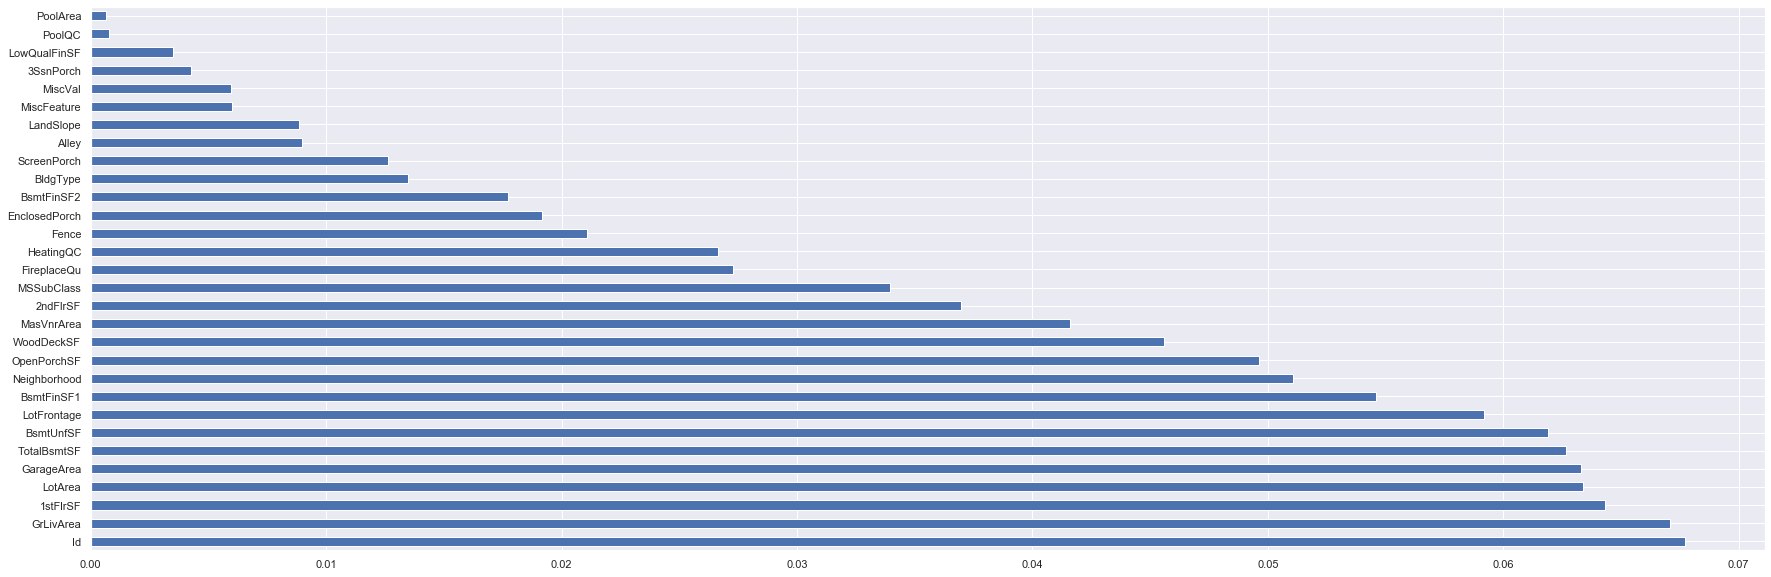

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh',figsize=(30,10))


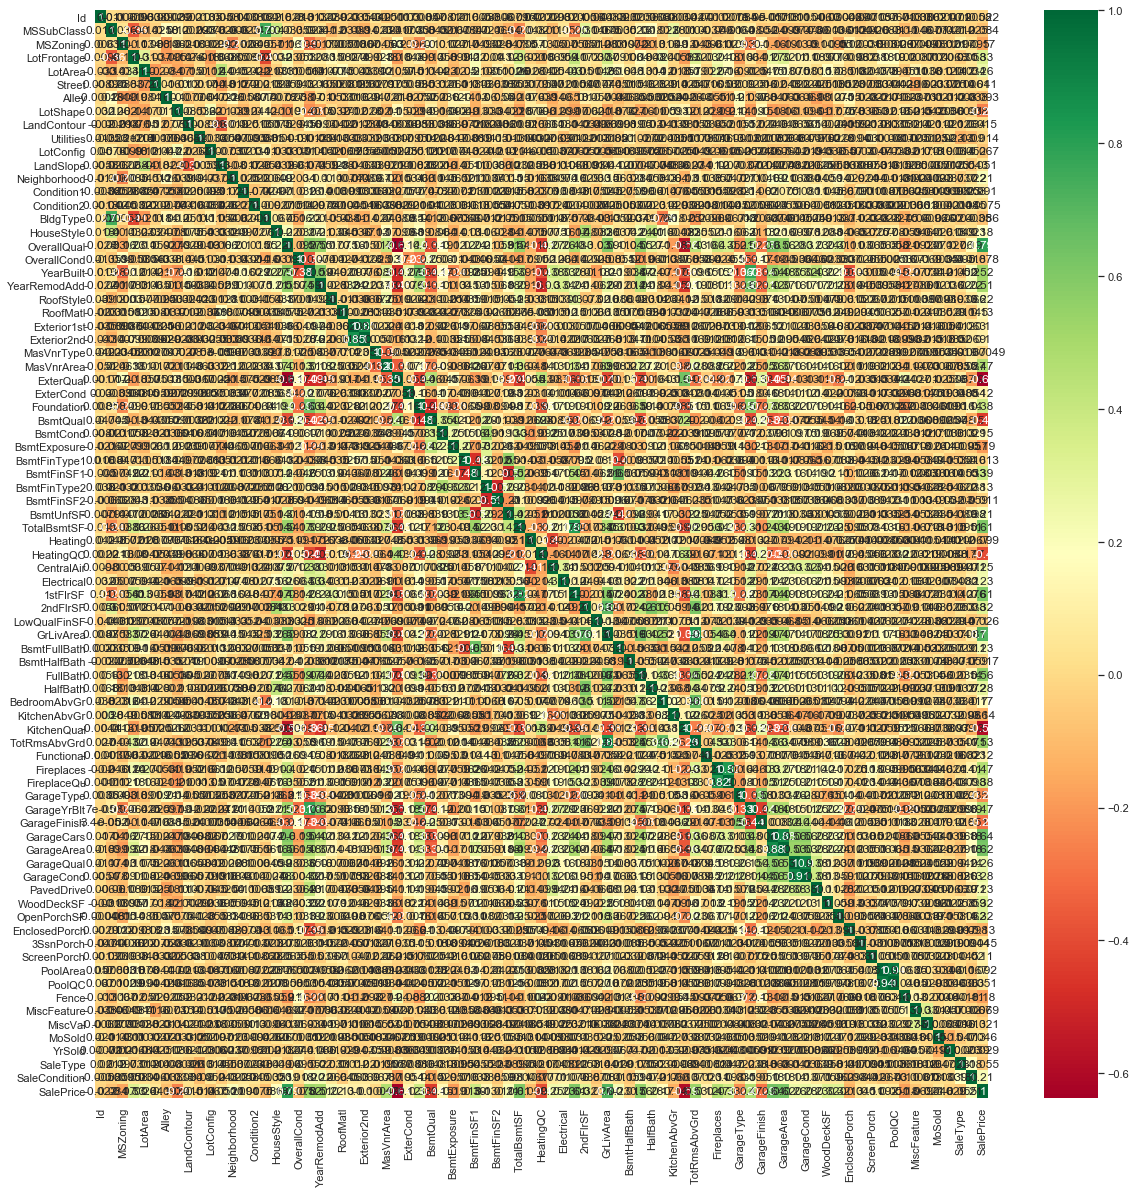

In [81]:
#get correlations of each features in dataset
corrmat = melbourne_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(melbourne_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [82]:
melbourne_features=['LotArea',
       'MiscVal' , 
       '2ndFlrSF',  
     'BsmtFinSF1',  
       'PoolArea',  
     'BsmtFinSF2',  
     'MasVnrArea',  
      'BsmtUnfSF',  
   'LowQualFinSF',  
      'GrLivArea',  
    'TotalBsmtSF',  
      '3SsnPorch',  
              'Id',
    'ScreenPorch',  
     'WoodDeckSF',  
       '1stFlrSF',
  'EnclosedPorch',  
     'GarageArea',  
    'OpenPorchSF',  
      'MSSubClass',  
     'LotFrontage',  
   'Neighborhood',  
       'BldgType',  
    'MiscFeature',  
    'FireplaceQu',  
      'HeatingQC',  
      'Fence',
       'PoolQC',            
       'Alley',    
       'LandSlope'] 
X=melbourne_data[melbourne_features]
X.describe()

,LotArea,MiscVal,2ndFlrSF,BsmtFinSF1,PoolArea,BsmtFinSF2,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,...,LotFrontage,Neighborhood,BldgType,MiscFeature,FireplaceQu,HeatingQC,Fence,PoolQC,Alley,LandSlope
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,43.489041,346.992466,443.639726,2.758904,46.549315,103.117123,567.240411,5.844521,1515.463699,...,70.049958,12.251370,0.493151,0.107534,1.969178,1.538356,0.467123,0.010274,0.090411,0.062329
std,9981.264932,496.123024,436.528436,456.098091,40.177307,161.319273,180.731373,441.866955,48.623081,525.480383,...,22.024023,6.013735,1.198277,0.555437,2.037956,1.739524,1.029191,0.158916,0.372151,0.276232
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,1129.500000,...,60.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9478.500000,0.000000,0.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,1464.000000,...,70.049958,12.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11601.500000,0.000000,728.000000,712.250000,0.000000,0.000000,164.250000,808.000000,0.000000,1776.750000,...,79.000000,17.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,215245.000000,15500.000000,2065.000000,5644.000000,738.000000,1474.000000,1600.000000,2336.000000,572.000000,5642.000000,...,313.000000,24.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,2.000000,2.000000


In [83]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [84]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   LotArea  MiscVal  2ndFlrSF  BsmtFinSF1  PoolArea  BsmtFinSF2  MasVnrArea  \
0     8450        0       854         706         0           0       196.0   
1     9600        0         0         978         0           0         0.0   
2    11250        0       866         486         0           0       162.0   
3     9550        0       756         216         0           0         0.0   
4    14260        0      1053         655         0           0       350.0   

   BsmtUnfSF  LowQualFinSF  GrLivArea  ...  LotFrontage  Neighborhood  \
0        150             0       1710  ...         65.0             5   
1        284             0       1262  ...         80.0            24   
2        434             0       1786  ...         68.0             5   
3        540             0       1717  ...         60.0             6   
4        490             0       2198  ...         84.0            15   

   BldgType  MiscFeature  FireplaceQu  

In [72]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

0.0

In [86]:
#Extracting the features we intend using to train the model
'''X=melbourne_data.iloc[:,:-1]

y=melbourne_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=1)

#summarize
print('Train', X_train.shape, y_train.shape)
print('Test',X_test.shape, y_test.shape)'''
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

28270.69589041096
